In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

In [2]:
from keras.preprocessing.image import ImageDataGenerator

In [3]:
image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               vertical_flip=True,
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [4]:
image_gen.flow_from_directory('dataset/dataset/binary/train')

Found 2834 images belonging to 2 classes.


In [5]:
image_gen.flow_from_directory('dataset/dataset/binary/test')

Found 706 images belonging to 2 classes.


In [6]:
image_shape = (100,100,3)

In [7]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [8]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100,100,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 19, 19, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 64)          0

In [13]:
train_image_gen = image_gen.flow_from_directory('dataset/dataset/binary/train',
                                               target_size=image_shape[:2],
                                               class_mode='binary')

Found 2834 images belonging to 2 classes.


In [14]:
train_image_gen.class_indices

{'Sakit': 0, 'Sehat': 1}

In [15]:
test_image_gen = image_gen.flow_from_directory('dataset/dataset/binary/test',
                                               target_size=image_shape[:2],
                                               class_mode='binary')

Found 706 images belonging to 2 classes.


In [16]:
test_image_gen.class_indices

{'Sakit': 0, 'Sehat': 1}

In [17]:
results = model.fit_generator(train_image_gen,validation_data=test_image_gen,epochs=17)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/17
89/89 [==============================] - 47s 524ms/step - loss: 0.5716 - accuracy: 0.6856 - val_loss: 0.3537 - val_accuracy: 0.8555
Epoch 2/17
89/89 [==============================] - 21s 234ms/step - loss: 0.2669 - accuracy: 0.8984 - val_loss: 0.1651 - val_accuracy: 0.9419
Epoch 3/17
89/89 [==============================] - 21s 234ms/step - loss: 0.2647 - accuracy: 0.8927 - val_loss: 0.1689 - val_accuracy: 0.9575
Epoch 4/17
89/89 [==============================] - 21s 234ms/step - loss: 0.1583 - accuracy: 0.9442 - val_loss: 0.0715 - val_accuracy: 0.9788
Epoch 5/17
89/89 [==============================] - 21s 236ms/step - loss: 0.0880 - accuracy: 0.9665 - val_loss: 0.0324 - val_accuracy: 0.9915
Epoch 6/17
89/89 [==============================] - 21s 236ms/step - loss: 0.0718 - accuracy: 0.9757 - val_loss: 0.0362 - val_accuracy: 0.9858
Epoch 7/17
89/89 [==============================] - 21s 240ms/step

In [18]:
print(results.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


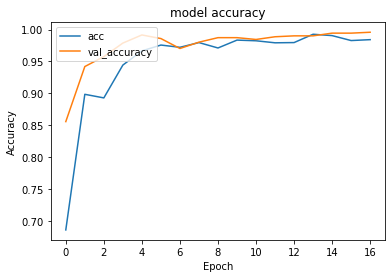

In [19]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['acc','val_accuracy'], loc='upper left')
plt.savefig('t1-binary.png')
plt.show()


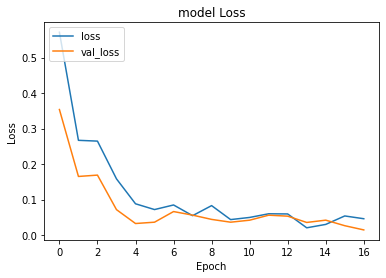

In [20]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss','val_loss'], loc='upper left')
plt.savefig('t2-binary.png')
plt.show()

In [21]:
train_image_gen.class_indices

{'Sakit': 0, 'Sehat': 1}

In [22]:
model.save('model-train-1-binary.h5')

In [21]:
model.save('model-train-9fldr')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model-train-9fldr\assets


In [28]:
new_model = tf.keras.models.load_model('model-train-1-binary.h5')

In [44]:
import numpy as np
from keras.preprocessing import image

foto = 'dataset/dataset/test/Tomato___Bacterial_spot/0a64655c-4052-4e5f-a696-2a6cf25d10c9___GCREC_Bact.Sp 6017.JPG'
# foto = 'dataset/dataset/test/Tomato___healthy/0a0d6a11-ddd6-4dac-8469-d5f65af5afca___RS_HL 0555.JPG'
# foto = 'dataset/dataset/test/Tomato___Late_blight/0a4b3cde-c83a-4c83-b037-010369738152___RS_Late.B 6985.JPG'
# foto = 'dataset/dataset/test/Tomato___Leaf_Mold/0a555f63-bf03-4958-8993-e1932b8dce9f___Crnl_L.Mold 9064.JPG'

foto = image.load_img(foto, target_size=(100,100))

foto = image.img_to_array(foto)

foto = np.expand_dims(foto, axis=0)
foto = foto/255

In [45]:
b=new_model.predict_classes(foto)
if b == 0:
    print('Sakit')
elif b == 1:
    print('Sehat')

Sakit


In [46]:
b=new_model.predict_proba(foto)
print(b)

[[3.4576737e-09]]
